Problem 2: CART-RF-ANN


An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [459]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

Data Dictionary

Target: Claim Status (Claimed)

Code of tour firm (Agency_Code)

Type of tour insurance firms (Type)

Distribution channel of tour insurance agencies (Channel)

Name of the tour insurance products (Product)

Duration of the tour (Duration in days)

Destination of the tour (Destination)

Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

The commission received for tour insurance firm (Commission is in percentage of sales) 

Age of insured (Age)


2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


In [460]:
df=pd.read_csv("insurance_part2_data (1).csv")

In [461]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [463]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [464]:
df.duplicated().sum()

139

In [465]:
df.drop_duplicates(inplace=True)

In [466]:
df.duplicated().sum()

0

In [467]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


Treating Bad data

In [468]:
df[df['Duration'] == -1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [469]:
df['Duration'].mean()

72.12023767913317

In [470]:
df['Duration'] = df['Duration'].replace(-1, value=df['Duration'].mean())

In [471]:
df.loc[1508]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration          72.120238
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

In [472]:
df1=df


In [473]:
df_numerical = df[['Age', 'Duration', 'Commision', 'Sales']]
df_numerical.head()

,Age,Duration,Commision,Sales
0,48,7.0,0.70,2.51
1,36,34.0,0.00,20.00
2,39,3.0,5.94,9.90
3,36,4.0,0.00,26.00
4,33,53.0,6.30,18.00


In [474]:
df_categorical = df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]
df_categorical.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


In [475]:
df_categorical['Claimed'].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

Univariate Analysis

Boxplots


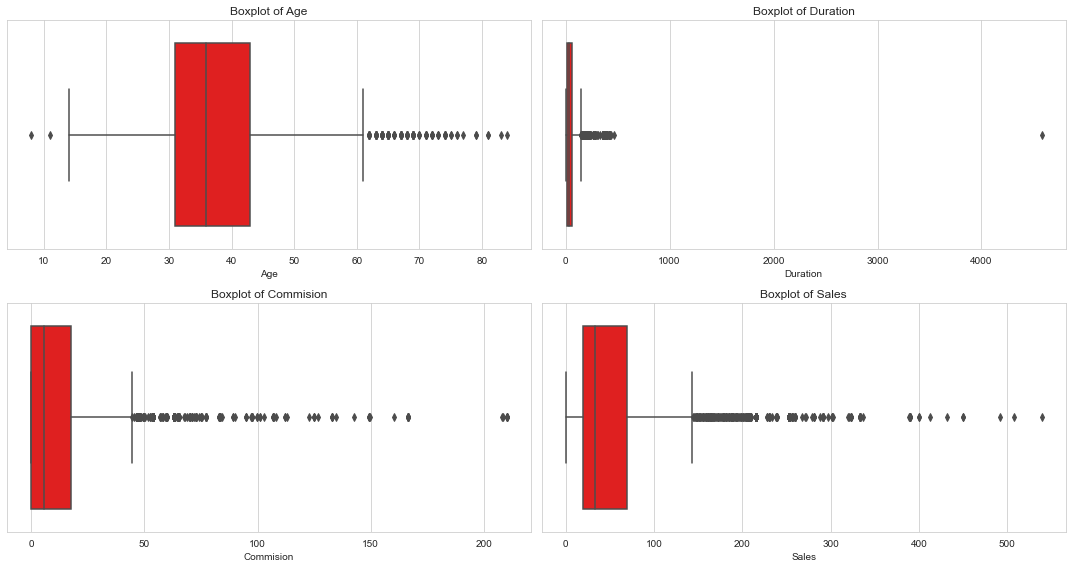

In [476]:
plt.figure(figsize = (15,8))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_numerical[feature_list[i]], data=df_numerical, orient='h', color='r')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [477]:
from scipy.stats import norm

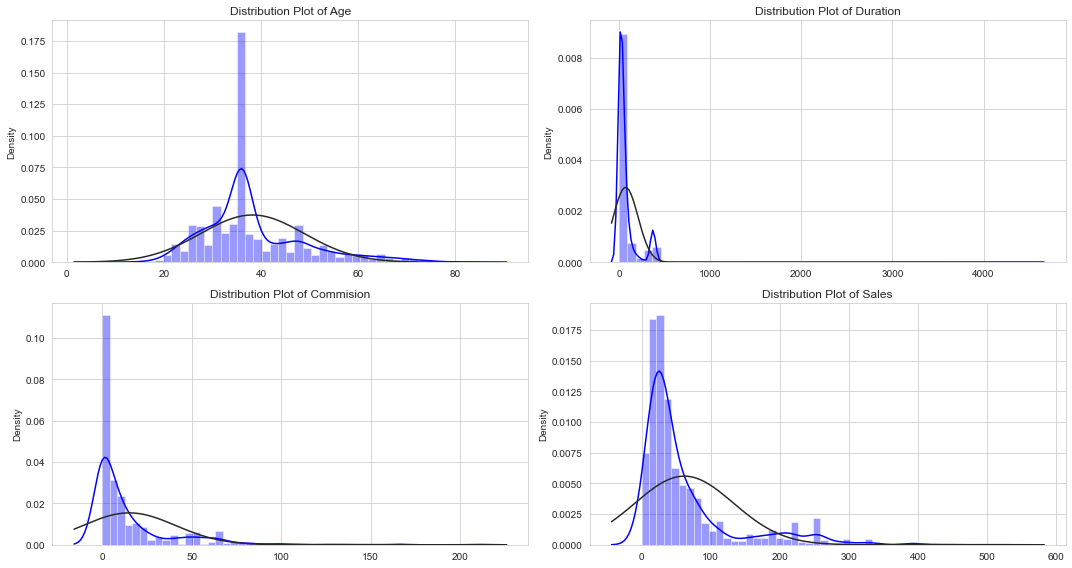

In [478]:
plt.figure(figsize = (15,8))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df_numerical[feature_list[i]], color='b', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [479]:
for columns in df_numerical.columns:
    print('Skewness of {} is'.format(columns), round(df_numerical[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_numerical[columns].kurt(),2))

Skewness of Age is 1.1
Kurtosis of Age is 1.44
Skewness of Duration is 13.79
Kurtosis of Duration is 422.71
Skewness of Commision is 3.1
Kurtosis of Commision is 13.59
Skewness of Sales is 2.34
Kurtosis of Sales is 5.97


Bivariate Analysis

Plotting numerical variables w.r.t Claimed status


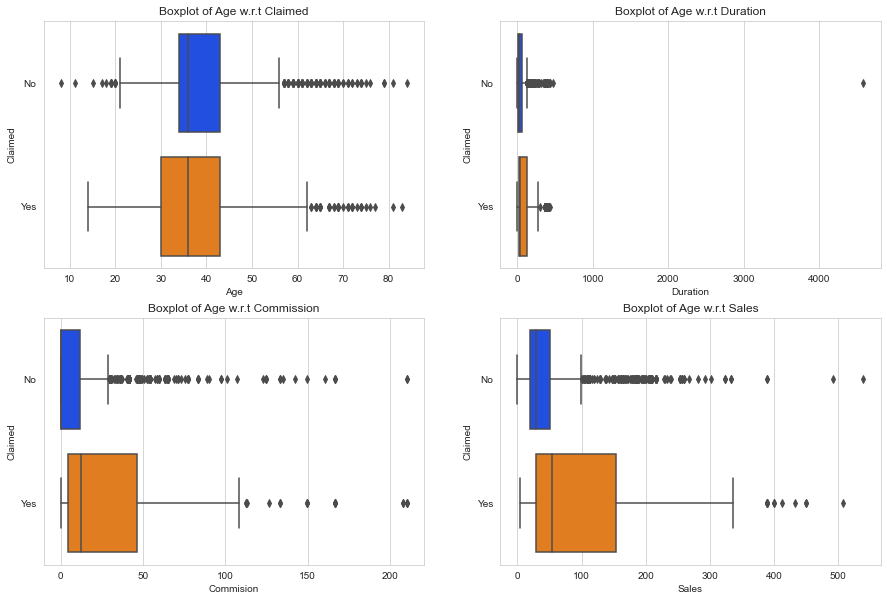

In [480]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Claimed', x='Age', data=df)
plt.title('Boxplot of Age w.r.t Claimed')

plt.subplot(2,2,2)
sns.boxplot(y='Claimed', x='Duration', data=df)
plt.title('Boxplot of Age w.r.t Duration')

plt.subplot(2,2,3)
sns.boxplot(y='Claimed', x='Commision', data=df)
plt.title('Boxplot of Age w.r.t Commission')

plt.subplot(2,2,4)
sns.boxplot(y='Claimed', x='Sales', data=df)
plt.title('Boxplot of Age w.r.t Sales');


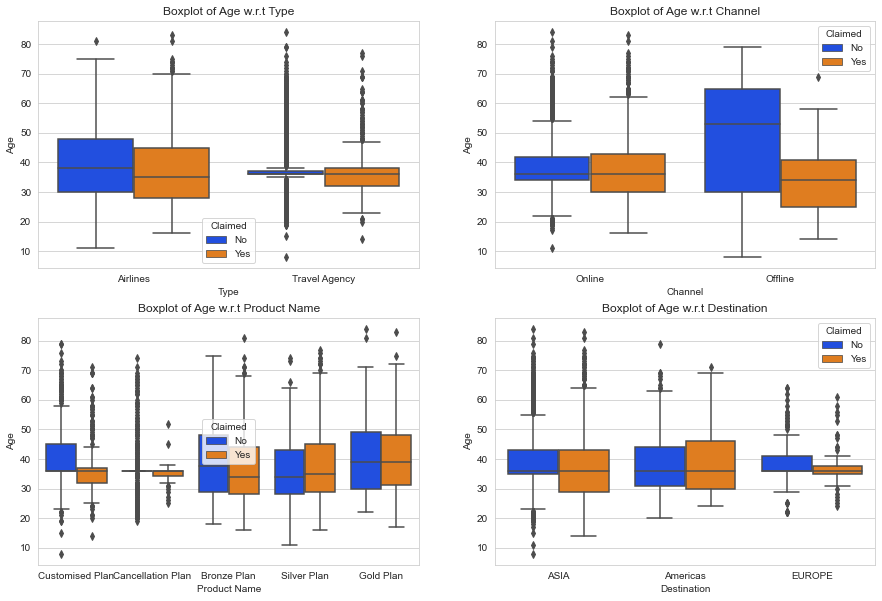

In [481]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Age', x='Type', hue='Claimed', data=df)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Type')

plt.subplot(2,2,2)
sns.boxplot(y='Age', x='Channel', hue='Claimed', data=df)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Channel')

plt.subplot(2,2,3)
sns.boxplot(y='Age', x='Product Name', hue='Claimed', data=df)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Product Name');

plt.subplot(2,2,4)
sns.boxplot(y='Age', x='Destination', hue='Claimed', data=df)
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Destination');


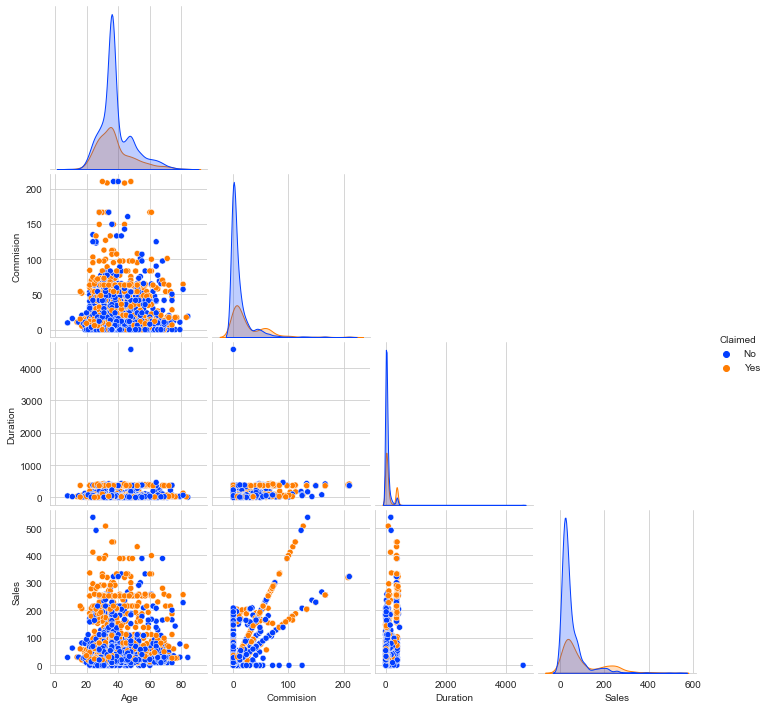

In [482]:
sns.pairplot(df, corner=True, hue='Claimed')

In [483]:
corr = df.corr()
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027226,0.036187
Commision,0.064759,1.000000,0.462073,0.762181
Duration,0.027226,0.462073,1.000000,0.549802
Sales,0.036187,0.762181,0.549802,1.000000


<AxesSubplot:>

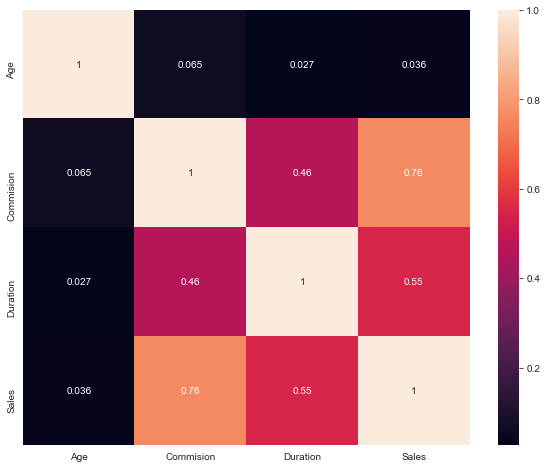

In [484]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [485]:
df['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
    
### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


In [486]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 193.1 KB


In [488]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [489]:
df_categorical['Claimed'].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [490]:
X = df.drop('Claimed', axis=1)

y = df.pop('Claimed')

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [491]:
from sklearn.model_selection import train_test_split

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [493]:
df.shape

(2861, 9)

In [494]:
from sklearn.tree import DecisionTreeClassifier

In [495]:
dtree_model = DecisionTreeClassifier(criterion='gini', random_state=0)

In [496]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [497]:
from sklearn import tree

In [498]:
train_char_label = ['No', 'Yes']
tree_file = open('tree_File.dot','w')
dot_data = tree.export_graphviz(dtree_model, out_file=tree_file, feature_names=list(X_train), class_names=train_char_label)
tree_file.close()

http://webgraphviz.com/

In [499]:
from sklearn.model_selection import GridSearchCV

In [500]:
param_grid = {
    'max_depth': [10,13,15],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [100,150,200]
}

In [501]:
reg_dtree = DecisionTreeClassifier()

In [502]:
grid_search = GridSearchCV(estimator=reg_dtree, param_grid=param_grid, cv=3, scoring='recall')

In [503]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 13, 15],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [100, 150, 200]},
             scoring='recall')

In [504]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [505]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150)

In [506]:
best_grid = grid_search.best_estimator_

In [507]:
best_grid.feature_importances_

array([0.01888435, 0.60924483, 0.        , 0.02937268, 0.        ,
       0.02069592, 0.28795869, 0.03384353, 0.        ])

Predicting on Training and Test data

In [508]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [509]:
print (pd.DataFrame(best_grid.feature_importances_, 
                    columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.609245
Sales           0.287959
Product Name    0.033844
Commision       0.029373
Duration        0.020696
Age             0.018884
Type            0.000000
Channel         0.000000
Destination     0.000000


Model Evaluation - CART

AUC and ROC for Training data

In [510]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

AUC: 0.83


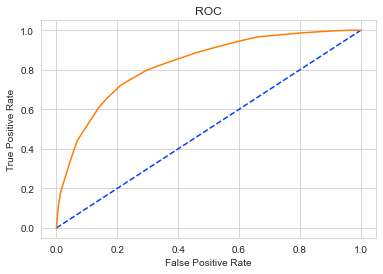

In [511]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.2f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC and ROC for Testing data

AUC: 0.78


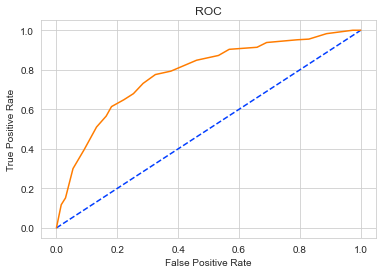

In [512]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

Confusion Matrix and Classification Report for Training Data - CART

In [513]:
print(confusion_matrix(y_train, ytrain_predict))

[[1186  192]
 [ 244  380]]


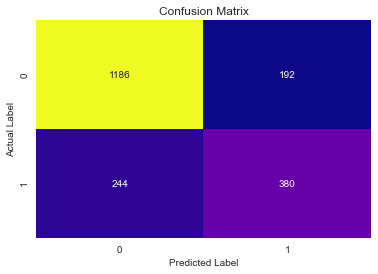

In [514]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [515]:
cart_train_accuracy = best_grid.score(X_train,y_train) 
cart_train_accuracy

0.7822177822177823

In [516]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1378
           1       0.66      0.61      0.64       624

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



Confusion Matrix and Classification Report for Testing data

In [517]:
print(confusion_matrix(y_test, ytest_predict))

[[476  93]
 [126 164]]


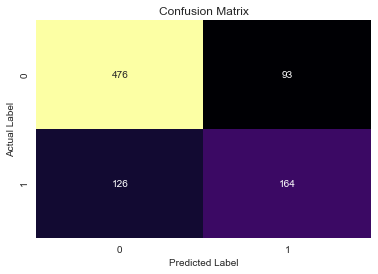

In [518]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [519]:
cart_test_accuracy = best_grid.score(X_test, y_test) 
cart_test_accuracy

0.7450523864959255

In [521]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       569
           1       0.64      0.57      0.60       290

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.74      0.75      0.74       859



In [523]:
cart_metrics = classification_report(y_train, ytrain_predict,output_dict=True)
dfcart = pd.DataFrame(cart_metrics).transpose()
cart_train_f1 = round(dfcart.loc["1"][2],2)
cart_train_recall = round(dfcart.loc["1"][1],2)
cart_train_precision = round(dfcart.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.61
cart_train_f1  0.64


In [524]:
cart_metrics = classification_report(y_test, ytest_predict, output_dict=True)
dfcart = pd.DataFrame(cart_metrics).transpose()
cart_test_precision = round(dfcart.loc["1"][0],2)
cart_test_recall = round(dfcart.loc["1"][1],2)
cart_test_f1 = round(dfcart.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.64
cart_test_recall  0.57
cart_test_f1  0.6


Conclusion for CART Model

Train Data:

AUC: 83%

Accuracy: 78%

Precision: 66%

f1-Score: 64%

Test Data:

AUC: 78%

Accuracy: 75%

Precision: 64%

f1-Score: 60%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Agency_Code is the most important variable for predicting claim status. Decision Tree root node split has been done based on Agency_Code.




# Building Random Forest Model

In [525]:
from sklearn.ensemble import RandomForestClassifier

In [526]:
param_grid_rfcl = {
    'max_depth': [10],## 20,30,40
    'max_features': [5],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [100], ## 60,70
    'n_estimators': [201] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3, scoring='recall')


In [527]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [5],
                         'min_samples_leaf': [10], 'min_samples_split': [100],
                         'n_estimators': [201]},
             scoring='recall')

In [528]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 201}

In [529]:
best_grid = grid_search.best_estimator_

In [530]:
best_grid

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=10,
                       min_samples_split=100, n_estimators=201, random_state=1)

In [531]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [532]:
print (pd.DataFrame(best_grid.feature_importances_, 
                    columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.369611
Product Name    0.201126
Sales           0.182622
Commision       0.090019
Duration        0.069473
Type            0.042939
Age             0.033528
Destination     0.007500
Channel         0.003182


Model Evaluation - Random Forest

AUC and ROC for Training data - Random Forest


AUC: 0.85


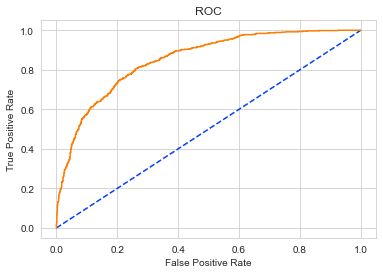

In [533]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.2f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

AUC: 0.80


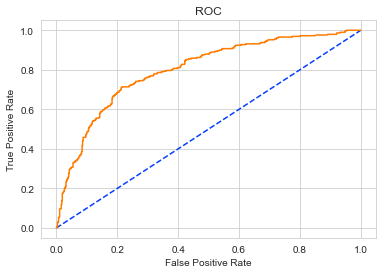

In [534]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

Confusion Matrix and Classification Report for Training Data - Random Forest

In [535]:
print(confusion_matrix(y_train, ytrain_predict))

[[1226  152]
 [ 247  377]]


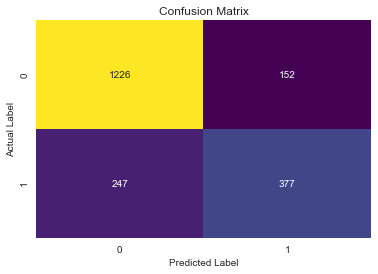

In [536]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [537]:
rf_train_accuracy = best_grid.score(X_train,y_train) 
rf_train_accuracy

0.8006993006993007

In [538]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1378
           1       0.71      0.60      0.65       624

    accuracy                           0.80      2002
   macro avg       0.77      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



Confusion Matrix and Classification Report for Testing data - Random Forest


In [539]:
print(confusion_matrix(y_test, ytest_predict))

[[488  81]
 [126 164]]


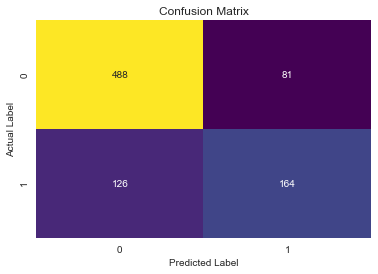

In [540]:
# Get the confusion matrix on the test data
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [541]:
# Test Data Accuracy
rf_test_accuracy = best_grid.score(X_test, y_test) 
rf_test_accuracy

0.7590221187427241

In [543]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       569
           1       0.67      0.57      0.61       290

    accuracy                           0.76       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.75      0.76      0.75       859



In [545]:
rf_metrics = classification_report(y_train, ytrain_predict,output_dict=True)
dfrf = pd.DataFrame(rf_metrics).transpose()
rf_train_precision = round(dfrf.loc["1"][0],2)
rf_train_recall = round(dfrf.loc["1"][1],2)
rf_train_f1 = round(dfrf.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.6
rf_train_f1  0.65


In [546]:
rf_metrics = classification_report(y_test, ytest_predict,output_dict=True)
dfrf = pd.DataFrame(rf_metrics).transpose()
rf_test_precision = round(dfrf.loc["1"][0],2)
rf_test_recall = round(dfrf.loc["1"][1],2)
rf_test_f1 = round(dfrf.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.57
rf_test_f1  0.61


Conclusion for Random Forest Model

Train Data:

AUC: 85%

Accuracy: 80%

Precision: 71%

f1-Score: 65%

Test Data:

AUC: 80%

Accuracy: 80%

Precision: 67%

f1-Score: 61%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Agency_Code is the most important variable for predicting claim status.


# Building Neural Network Model


In [547]:
from sklearn.neural_network import MLPClassifier

In [548]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [549]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [1000],
    'max_iter': [5000],
    'solver': ['sgd','adam'],
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 10)


In [550]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [1000], 'max_iter': [5000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001]})

In [551]:
grid_search.best_params_

{'hidden_layer_sizes': 1000, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.001}

In [552]:
grid_search.best_estimator_

MLPClassifier(hidden_layer_sizes=1000, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001)

In [553]:
best_grid = grid_search.best_estimator_

In [554]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [555]:
print(confusion_matrix(y_train,ytrain_predict))

[[1269  109]
 [ 364  260]]


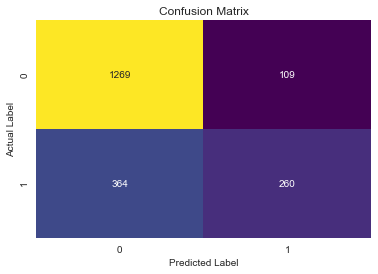

In [556]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [557]:
nn_train_accuracy = best_grid.score(X_train,y_train) 
nn_train_accuracy

0.7637362637362637

In [558]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1378
           1       0.70      0.42      0.52       624

    accuracy                           0.76      2002
   macro avg       0.74      0.67      0.68      2002
weighted avg       0.75      0.76      0.74      2002



In [559]:
print(confusion_matrix(y_test, ytest_predict))

[[516  53]
 [179 111]]


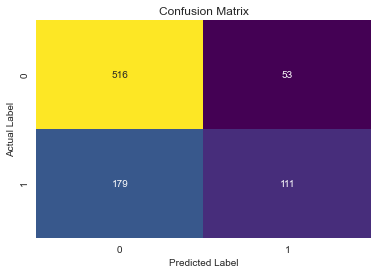

In [560]:
# Get the confusion matrix on the train data
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [561]:
nn_test_accuracy = best_grid.score(X_test,y_test) 
nn_test_accuracy

0.729918509895227

In [562]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       569
           1       0.68      0.38      0.49       290

    accuracy                           0.73       859
   macro avg       0.71      0.64      0.65       859
weighted avg       0.72      0.73      0.71       859



AUC: 0.80


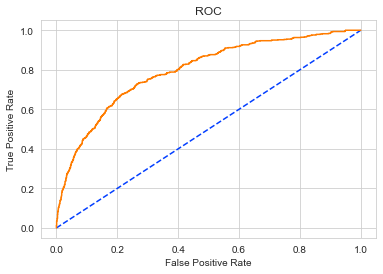

In [563]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.2f' % nn_train_auc)
# calculate roc curve
nn_train_fpr, nn_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr);

AUC: 0.78


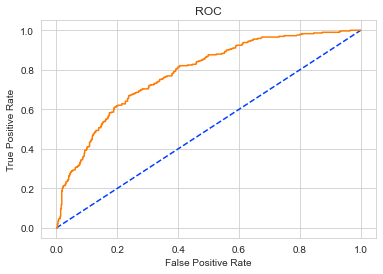

In [565]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % nn_test_auc)
# calculate roc curve
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr);


In [566]:
nn_metrics = classification_report(y_train, ytrain_predict,output_dict=True)
dfnn = pd.DataFrame(nn_metrics).transpose()
nn_train_precision = round(dfnn.loc["1"][0],2)
nn_train_recall = round(dfnn.loc["1"][1],2)
nn_train_f1 = round(dfnn.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)


nn_train_precision  0.7
nn_train_recall  0.42
nn_train_f1  0.52


In [567]:
nn_metrics = classification_report(y_test, ytest_predict,output_dict=True)
dfnn = pd.DataFrame(nn_metrics).transpose()
nn_test_precision = round(dfnn.loc["1"][0],2)
nn_test_recall = round(dfnn.loc["1"][1],2)
nn_test_f1 = round(dfnn.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.68
nn_test_recall  0.38
nn_test_f1  0.49


# Conclusion for Artificial Neural Network (ANN)

## Train Data:

AUC: 83%

Accuracy: 78%

Precision: 69%

f1-Score: 61%

## Test Data:

AUC: 84%

Accuracy: 78%

Precision: 73%

f1-Score: 62%


### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner

In [568]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_accuracy,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_accuracy,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_accuracy,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_accuracy,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_accuracy,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_accuracy,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.75,0.80,0.76,0.76,0.73
AUC,0.83,0.78,0.85,0.80,0.80,0.78
Recall,0.61,0.57,0.60,0.57,0.42,0.38
Precision,0.66,0.64,0.71,0.67,0.70,0.68
F1 Score,0.64,0.60,0.65,0.61,0.52,0.49


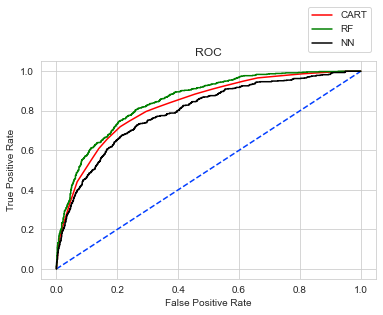

In [569]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');


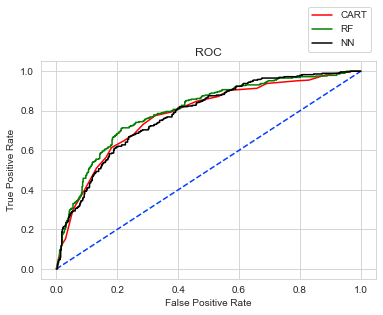

In [570]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');


Out of the 3 models, Random Forest has slightly better performance than the CART and ANN model.

Overall all the 3 models are reasonably stable enough to be used for making any future predictions. 

From CART and Random Forest Model, the variable Agency_Code is found to be the most useful feature amongst all other features for predicting if a customer has claimed the insurance or not.



# --END--